---------- First 5 Rows ----------
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0

---------- Data Info & Missing Values ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
clean_text    4
category      7
dtype: int64

---------- Sentiment Category Distribution ----------
category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64


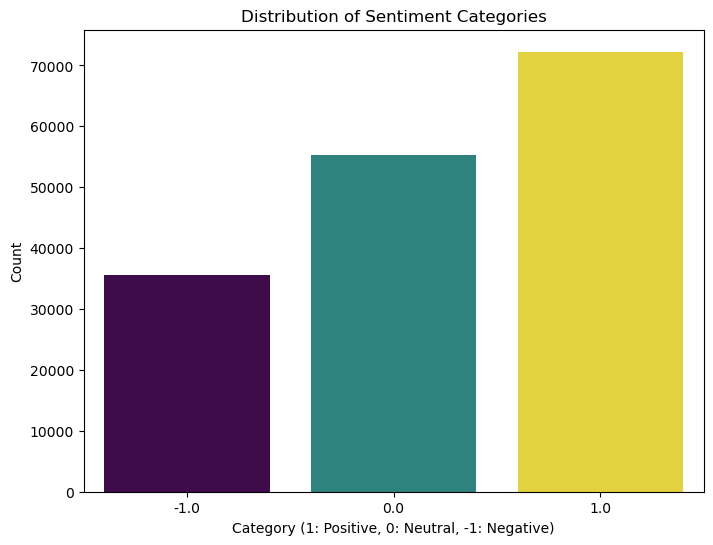

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

df = pd.read_csv('Twitter_Data.csv')

print("---------- First 5 Rows ----------")
print(df.head())

print("\n---------- Data Info & Missing Values ----------")
df.info()
print(df.isnull().sum())

df.dropna(subset=['clean_text'], inplace=True)

print("\n---------- Sentiment Category Distribution ----------")
print(df['category'].value_counts())

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df, hue='category', palette='viridis', legend=False)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Category (1: Positive, 0: Neutral, -1: Negative)')
plt.ylabel('Count')
plt.show()

In [8]:
import re
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Make text lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

# THIS IS THE LINE THAT CREATES THE COLUMN
df['processed_text'] = df['clean_text'].apply(preprocess_text)

print("'processed_text' column created successfully.")
print(df[['clean_text', 'processed_text']].head())

'processed_text' column created successfully.
                                          clean_text  \
0  when modi promised “minimum government maximum...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi  welcome bjp t...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                      processed_text  
0  modi promised minimum government maximum gover...  
1             talk nonsense continue drama vote modi  
2  say vote modi welcome bjp told rahul main camp...  
3  asking supporters prefix chowkidar names modi ...  
4  answer among powerful world leader today trump...  


In [11]:
from sklearn.model_selection import train_test_split

X = df['processed_text']
y = df['category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Text data has been vectorized successfully.")
print("Shape of the training data matrix:", X_train_tfidf.shape)

Text data has been vectorized successfully.
Shape of the training data matrix: (130375, 5000)


In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

print("Sentiment analysis model trained successfully.")

Sentiment analysis model trained successfully.


In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative (-1)', 'Neutral (0)', 'Positive (1)']))


Model Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

Negative (-1)       0.88      0.44      0.59      7102
  Neutral (0)       0.84      0.66      0.74     11042
 Positive (1)       0.66      0.93      0.77     14450

     accuracy                           0.73     32594
    macro avg       0.79      0.68      0.70     32594
 weighted avg       0.77      0.73      0.72     32594



In [15]:
new_sentence = "this movie was absolutely amazing and I really enjoyed it"

processed_sentence = preprocess_text(new_sentence)

vectorized_sentence = tfidf_vectorizer.transform([processed_sentence])

prediction = model.predict(vectorized_sentence)

sentiment_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
predicted_sentiment = sentiment_map[prediction[0]]

print(f"\nSentence: '{new_sentence}'")
print(f"Predicted Sentiment: {predicted_sentiment}")


Sentence: 'this movie was absolutely amazing and I really enjoyed it'
Predicted Sentiment: Positive
